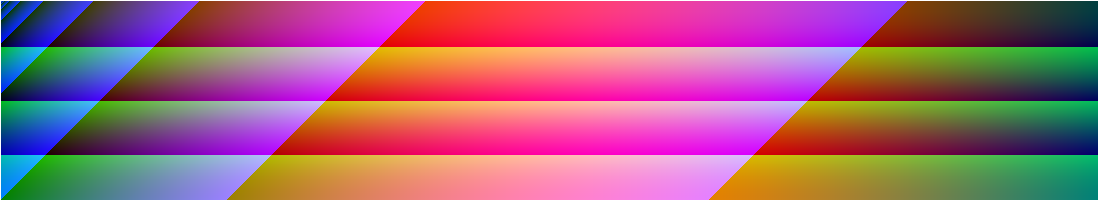

In [1]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from PIL.PngImagePlugin import PngImageFile, PngInfo
from datetime import datetime

import numpy as np

W = 512
H = 512

collection = []
show = False
save = False

xy = []
trigo = []
log = []
mod = []
rnd = []

elem = ["xy", "trigo", "log", "mod", "rnd"]

def stat(md) :
    xy.append(md["xy"])
    trigo.append(md["trigo"])
    log.append(md["log"])
    mod.append(md["mod"])
    rnd.append(md["rnd"])
    
def ctags(md) :
    return "XY:"+md["xy"]+" TRIGO:"+md["trigo"]+" LOG:"+md["log"]+" MOD:"+md["mod"]+" RND:"+md["rnd"]

im = Image.new("RGB", (1098, 200), "white")
for x in range(1,1098) :
    for y in range(1,200) :
        im.putpixel((x,y), (int(np.sin(x/1098*np.pi)*256),int(np.cos(y/200*np.pi)*256)%192,int(338*np.log(x+y)+2)%256))
display(im)

# RGB512 
This is the first in a series of generative art collections to be published on OpenSea.

This collection, entitled RGB512, consists of 16 RGB images of 512 x 512 size generated by simple functions of the form $ (x,y,\theta) \to (r,g,b) $ that map the two coordinates of a pixel ($ x $ and $ y $) and a random number $ \theta $ (extracted from the uniform distribution $ [0,1] $) to the 3 RGB channels.

Every image is generated by three handcrafted formulas, one for each channel:

$
\left\{\begin{align} 
&r = f_R(x,y,\theta) \\ 
&g = f_G(x,y,\theta)  \\ 
&b = f_B(x,y,\theta)
\end{align}\right.
$

Every channel function $f_C$ may include: 
* a combination of x and y => tagged as _XY:C_
* a trigonometric function => tagged as _TRIGO:C_
* a  logarithmic function => tagged as _LOG:C_
* a modulo operator => tagged as _MOD:C_
* a random number => tagged as _RND:C_

The 5 tags constitute a vector that characterizes the pattern of the image crated by the channel functions. To ensure a pattern variability in the collection which gives a character of uniqueness to each item, every image has been generated using a specific vector of _characteristic tags_.

## Image IM1

This image is generated by the following function definiton

$
\left\{\begin{align} 
&r = x \\ 
&g = y  \\ 
&b = x+y \end{align}\right.
$

Its characteristic tags vector is

| IM/TAG | XY  | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM1    | B   | N     | N   | N   | N   |

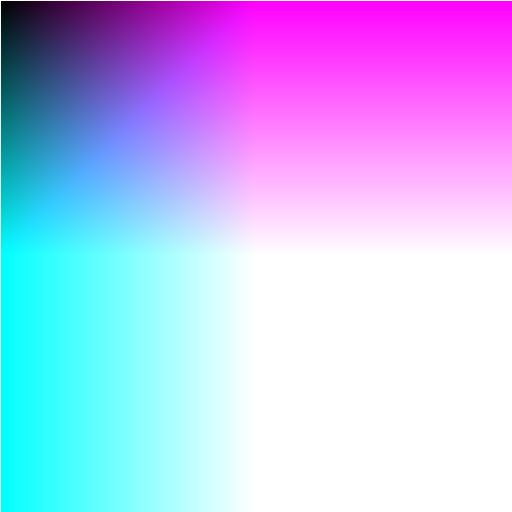

In [2]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (x, y, x+y))
md = { "xy": "B", "trigo": "N", "log": "N", "mod": "N", "rnd": "N" }
collection.append(("IM1", im, md))
stat(md)
display(im)

## Image IM2
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r = x \bmod 128 \\ 
&g = y \bmod 128  \\ 
&b = \left(x+y\right) \bmod 256 \end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM2    |  B  | N     | N   | RGB | N   |

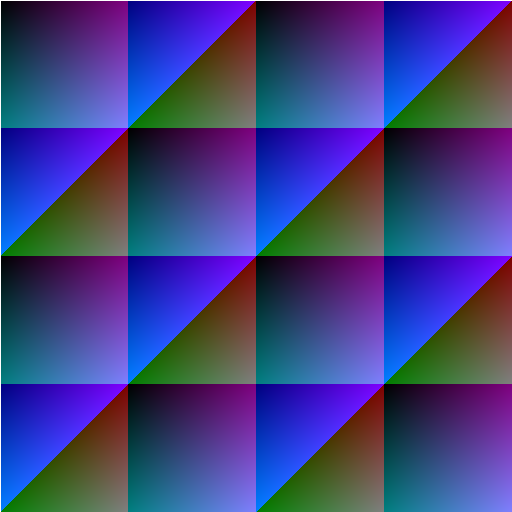

In [3]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (x%128, y%128, (x+y)%256))
md = { "xy": "B", "trigo": "N", "log": "N", "mod": "RGB", "rnd": "N" }        
collection.append(("IM2", im, md))
stat(md)
display(im)

## Image IM3
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r = 256 \sin{\frac{\pi}{512} x} \\ 
&g = 256 \cos{\frac{\pi}{512} y}  \\ 
&b = (x+y) \bmod 256 
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM3    |  B  | RG    | N   |   B | N   |

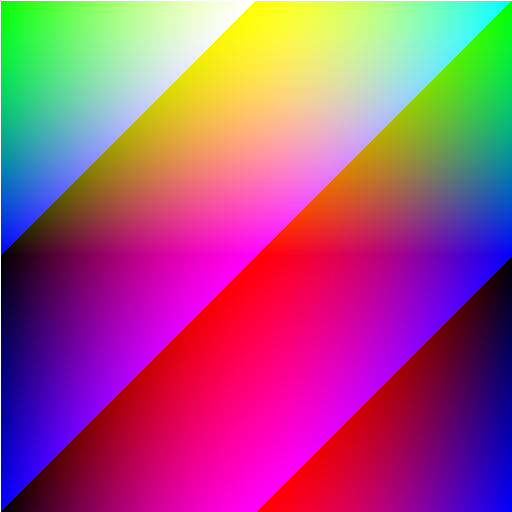

In [4]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (int(np.sin(x/W*np.pi)*256),int(np.cos(y/H*np.pi)*256),(x+y)%256))
md = { "xy": "B", "trigo": "RG", "log": "N", "mod": "B", "rnd": "N" }   
collection.append(("IM3", im, md))
stat(md)
display(im)

## Image IM4
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r = 256 \sin{\frac{\pi}{512} x}  \\ 
&g = 256 \cos{\frac{\pi}{512} y} \bmod 192\\ 
&b = (x+y) \bmod 256 
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM4    |  B  | RG    | N   |  GB | N   |

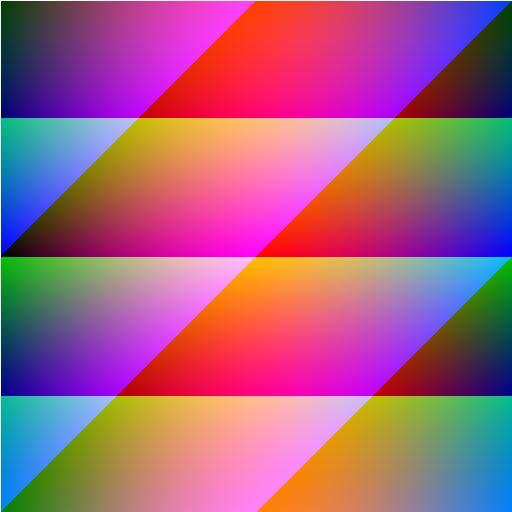

In [5]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (int(np.sin(x/W*np.pi)*256),int(np.cos(y/H*np.pi)*256)%192,(x+y)%256))
md = { "xy": "B", "trigo": "RG", "log": "N", "mod": "GB", "rnd": "N" } 
collection.append(("IM4", im, md))
stat(md)
display(im)

## Image IM5
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r = 256 \cos{\frac{\pi}{512} x} \bmod 128 \\ 
&g = 256 \cos{\frac{\pi}{512} y} \bmod 128 \\ 
&b = (x+y) \bmod 256 
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM5    |  B  | RG    | N   | RGB | N   |

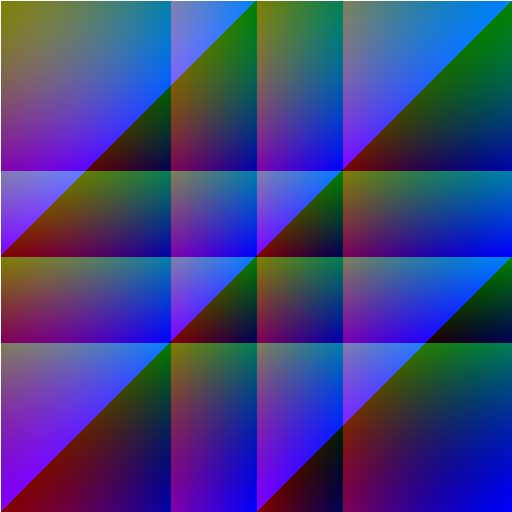

In [6]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (int(np.cos(x/W*np.pi)*256)%128,int(np.cos(y/H*np.pi)*256)%128,(x+y)%256))
md = { "xy": "B", "trigo": "RG", "log": "N", "mod": "RGB", "rnd": "N" } 
collection.append(("IM5", im, md))
stat(md)
display(im)

## Image IM6
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r = x \bmod \left( 256 \sin{\frac{\pi}{1024} x } +1 \right) \\ 
&g = y \bmod 128 \\ 
&b = (x+y) \bmod 256 
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM6    |  B  | R     | N   | RGB | N   |

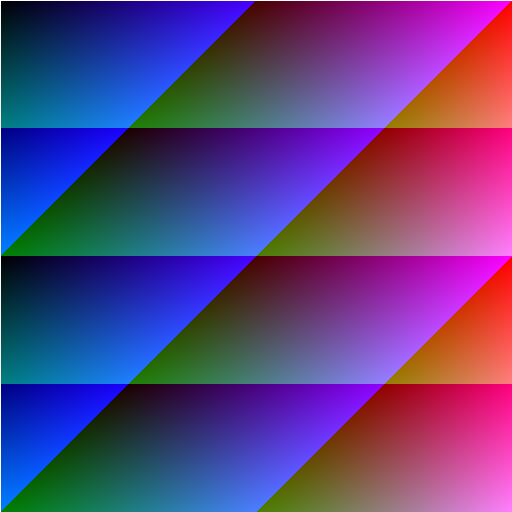

In [7]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (x%int(np.sin(x/W*np.pi/2)*256+1),y%128,(x+y)%256))
md = { "xy":"B", "trigo": "R", "log": "N", "mod": "RGB", "rnd": "N" } 
collection.append(("IM6", im, md))
stat(md)
display(im)

## Image IM7
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r = x \bmod \left( 256 \sin{\frac{\pi}{1024} x } +1 \right) \\ 
&g = 256 \ln{ \frac{y}{1.04799}} \bmod 128 \\ 
&b = (x+y) \bmod 256 
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM7    |  B  | R     | G   | RGB | N   |

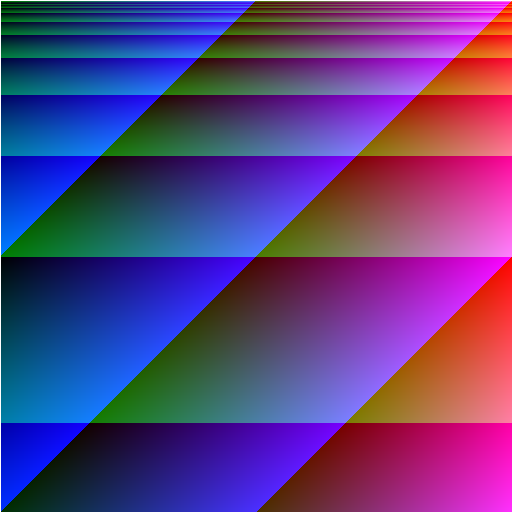

In [8]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (x%int(np.sin(x/W*np.pi/2)*256+1),int(np.log(y/1.04799)*256)%128,(x+y)%256))
md = { "xy":"B", "trigo": "R", "log": "G", "mod": "RGB", "rnd": "N" }
collection.append(("IM7", im, md))
stat(md)
display(im)

## Image IM8
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r = x \bmod \left( 256 \sin{\frac{\pi}{1024} x } +1 \right) \\ 
&g = \ln{ \left( x + y \right) } \bmod 128 \\ 
&b = (x+y) \bmod 256 
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM8    | GB  | R     | G   | RGB | N   |

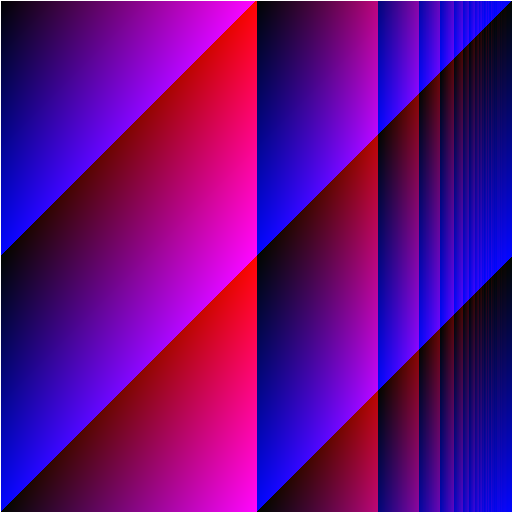

In [9]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (x%int(np.sin(x/W*np.pi)*256+1),int(np.log(x+y))%128,(x+y)%256))
md = { "xy":"GB", "trigo": "R", "log": "G", "mod": "RGB", "rnd": "N" }
collection.append(("IM8", im, md))
stat(md)
display(im)

## Image IM9
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r = x \bmod \left( 256 \sin{\frac{\pi}{1024} x } +1 \right) \\ 
&g = 256 \ln{ \frac{x + y}{1.04799}} \bmod 128 \\ 
&b = \frac{y}{10} 
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM9    | G   | R     | G   | RG  | N   |

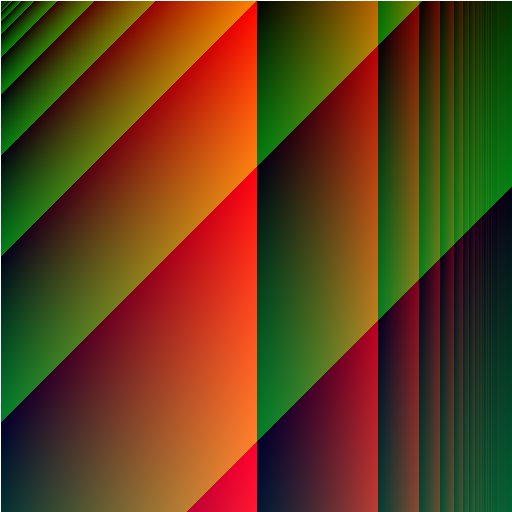

In [10]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (x%int(np.sin(x/W*np.pi)*256+1),int(np.log((x+y)/1.04799)*256)%128,int(y*0.1)))
md = { "xy":"G", "trigo": "R", "log": "G", "mod": "RG", "rnd": "N" }
collection.append(("IM9", im, md))
stat(md)
display(im)

## Image IM10
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r = \left( x + 256 \sin{\frac{\pi}{1024} x } \right) \bmod 256 \\ 
&g = \left( y + 256 \sin{\frac{\pi}{1024} y } \right) \bmod 256 \\ 
&b = \left( x + y + \sin{\frac{\pi}{2} x} + \sin{\frac{\pi}{2} y} \right) \bmod 256 
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM10   | B   | RGB   | N   | RGB | N   |

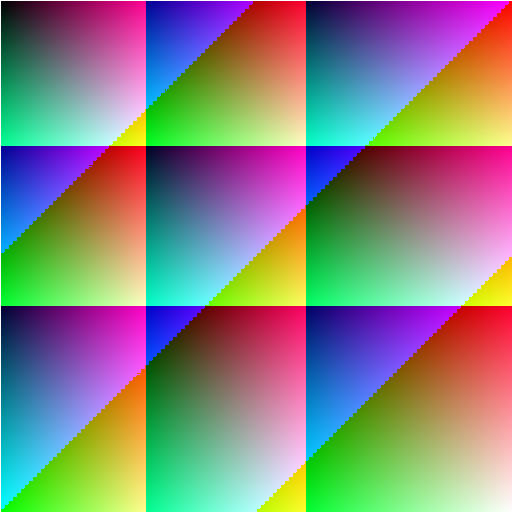

In [11]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        im.putpixel((x,y), (int(x+np.sin(x/W*np.pi/2)*256)%256,int(y+np.sin(y/H*np.pi/2)*256)%256,int(x+y+np.sin(x*np.pi/2)+np.sin(y*np.pi/2))%256))
md = { "xy":"B", "trigo": "RGB", "log": "N", "mod": "RGB", "rnd": "N" }
collection.append(("IM10", im, md))
stat(md)
display(im)

## Image IM11
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r = \left( x + 256 \sin{\frac{\pi}{1536} x } \right) \bmod 256 \\ 
&g = \left( y + 256 \sin{\frac{\pi}{1536} y } \right) \bmod 256 \\ 
&b = 32 \log{\frac{xy}{6}}   \bmod 256 
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM11   | B   | RG    | B   | RGB | N   |

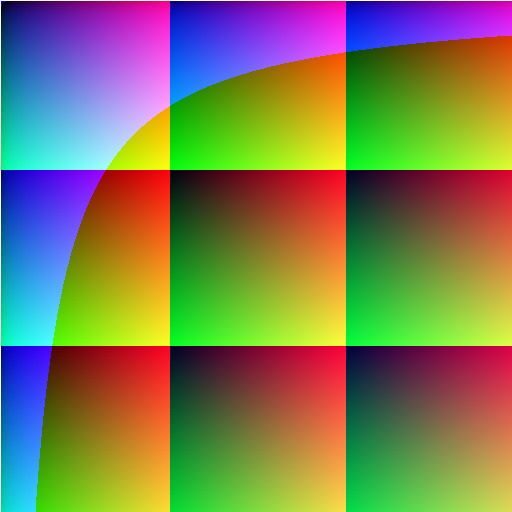

In [12]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        im.putpixel((x,y), (int(x+np.sin(x/W*np.pi/3)*256)%256,int(y+np.sin(y/H*np.pi/3)*256)%256,int(np.log(x/6*y)*32)%256))
md = { "xy":"B", "trigo": "RG", "log": "B", "mod": "RGB", "rnd": "N" }
collection.append(("IM11", im, md))
stat(md)
display(im)

## Image IM12
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r =  x \bmod \left( 256 \sin{\frac{\pi}{1024} x } +1 \right) \\ 
&g = y \sin{\frac{\pi}{2048} y } \bmod 64 \\ 
&b =  512 \sin{ x y } 
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM12   | B   | RGB    | N   | RG  | N   |

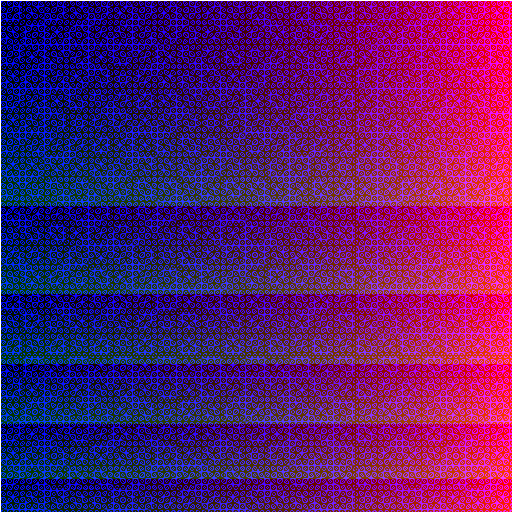

In [13]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        im.putpixel((x,y), ((x)%int(np.sin(x/W*np.pi/2)*256+1),int(y*np.sin(np.pi/4*y/H))%64,int(np.sin(x*y)*512)))
md = { "xy":"B", "trigo": "RGB", "log": "N", "mod": "RG", "rnd": "N" }
collection.append(("IM12", im, md))
stat(md)
display(im)

## Image IM13
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r =  256 \sin{\frac{\pi}{512} x } \\ 
&g = \left( 256 \cos{\frac{\pi}{512} y } \right) \bmod 192 \\ 
&b = \left( 4+256 \log{ \left( x+y+512\theta \right)} \right) \bmod 256 
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM13   | B   | RG    | B   |  GB | B   |

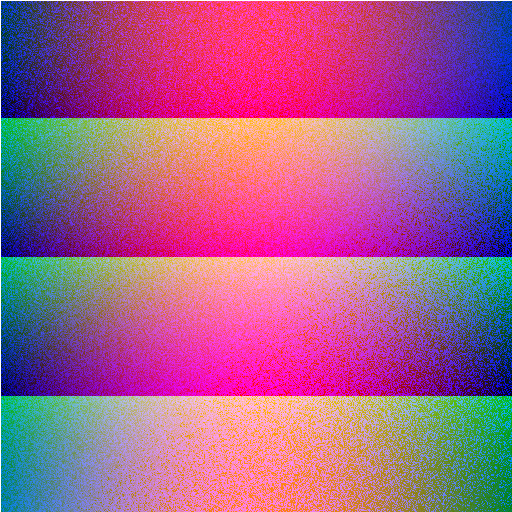

In [14]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (int(np.sin(x/W*np.pi)*256),int(np.cos(y/H*np.pi)*256)%192,int(256*np.log(x+y+t*512)+4)%256))
md = { "xy":"B", "trigo": "RG", "log": "B", "mod": "GB", "rnd": "B" }
collection.append(("IM13", im, md))
stat(md)
display(im)

## Image IM14
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r =  256 \theta \sin{\frac{\pi}{2}x} \\ 
&g = \left( x+y \right) \bmod 256 \\ 
&b = \left( x-y \right) \bmod 256 
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM14   | GB  | R     | N   |  GB | R   |

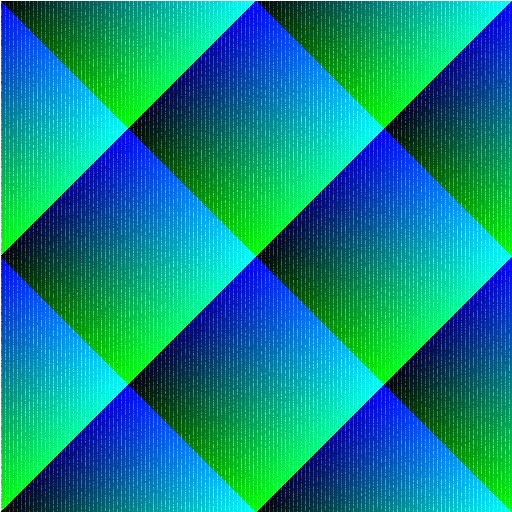

In [15]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (int(256*t*np.sin(x*np.pi/2)), (x+y)%256, (x-y)%256 ))
md = { "xy":"GB", "trigo": "R", "log": "N", "mod": "GB", "rnd": "R" }
collection.append(("IM14", im, md))
stat(md)
display(im)

## Image IM15
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r = \left( x+y \right) \bmod 256 \\ 
&g = \left( 2x+y \right) \bmod 256 \\ 
&b = \left( 2x-y \right) \bmod 256
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM15   | RGB | N     | N   | RGB | N   |

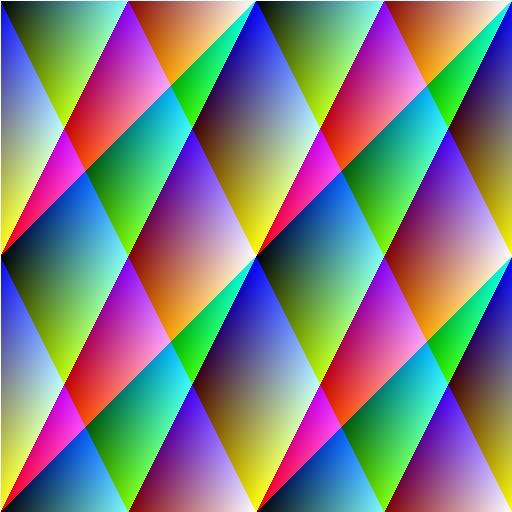

In [16]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (int(x+y)%256, (2*x+y)%256, (2*x-y)%256 ))
md = { "xy":"RGB", "trigo": "N", "log": "N", "mod": "RGB", "rnd": "N" }
collection.append(("IM15", im, md))
stat(md)
display(im)

## Image IM16
This image is generated by the following function definiton

$
\left\{\begin{align} 
&r = \theta y \bmod 256 \\ 
&g = \theta x \bmod 256 \\ 
&b = \left( x-y \right) \bmod 256
\end{align}\right.
$

Its characteristic tags vector is

| IM/TAG |  XY | TRIGO | LOG | MOD | RND |
|:------:|:---:|:-----:|:---:|:---:|:---:|
| IM16   |   B | N     | N   | RGB | RG  |

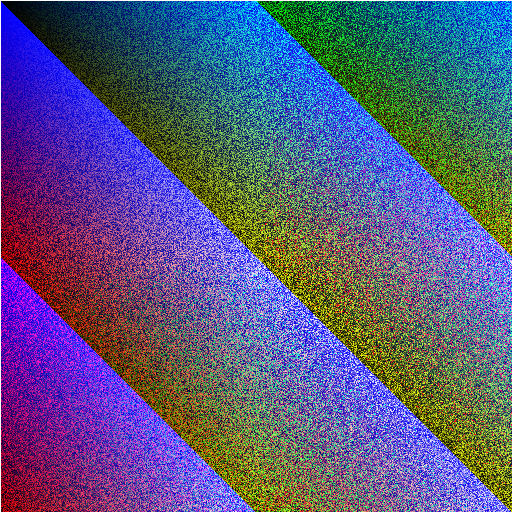

In [17]:
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (int(t*y)%256, (x*t)%256, (x-y)%256 ))
md = { "xy":"B", "trigo": "N", "log": "N", "mod": "RGB", "rnd": "RG" }
collection.append(("IM16", im, md))
stat(md)
display(im)

## Prepare collection for publishing

The 16 images have been generated as PNG files and published on OpenSea as NFT on the Polygon chain.

Each image has a unique characetristic tags vector. Several images may share some tags while others are the only ones to have a specific tag. The latest are listed below and are tagged also in the OpenSea using the properties slot in item metadata.

In [18]:
stats = {}
stats["xy"] = np.unique(xy, return_counts=True)
stats["trigo"] = np.unique(trigo, return_counts=True)
stats["log"] = np.unique(log, return_counts=True)
stats["mod"] = np.unique(mod, return_counts=True)
stats["rnd"] = np.unique(rnd, return_counts=True)

tags = []

C = 4
R = int(np.ceil(16/C))

mosaic = Image.new("RGB", (512*C+50*(C-1), (512+50)*R), "white")
i = 0

font = ImageFont.truetype("arial.ttf", 21)

for c in collection :
    name = c[0]
    im = c[1]
    md = c[2]
    tags.append(ctags(md))
    unique = ""
    for e in elem :
        if md[e] in stats[e][0][stats[e][1]==1] :
            if unique == "" : unique = e.upper()+":"+md[e]
            else : unique = unique + ", " + e.upper()+":"+md[e]
    if not unique == "" : print("Image "+name+" is the only one with tag "+unique)
    metadata = PngInfo()
    metadata.add_text("Title", name)
    metadata.add_text("Author", "Stefano Cazzella")
    metadata.add_text("Source", "RGB512")
    metadata.add_text("Creation Time", datetime.now().strftime("%m/%d/%Y, %H:%M:%S"))
    if save : im.save("RGB512\\"+name+".png", pnginfo=metadata)
    mosaic.paste(im, ((i%C)*(512+50), int(i/C)*(512+50)))
    ImageDraw.Draw(mosaic).text(((i%C)*(512+50), int(i/C)*(512+50)+522), name+" - "+ctags(md), font=font, fill='rgb(0, 0, 0)')
    i = i + 1

if save : mosaic.save("RGB512\\MOSAIC.png")


Image IM1 is the only one with tag MOD:N
Image IM3 is the only one with tag MOD:B
Image IM9 is the only one with tag XY:G
Image IM13 is the only one with tag RND:B
Image IM14 is the only one with tag RND:R
Image IM15 is the only one with tag XY:RGB
Image IM16 is the only one with tag RND:RG


### Mosaic

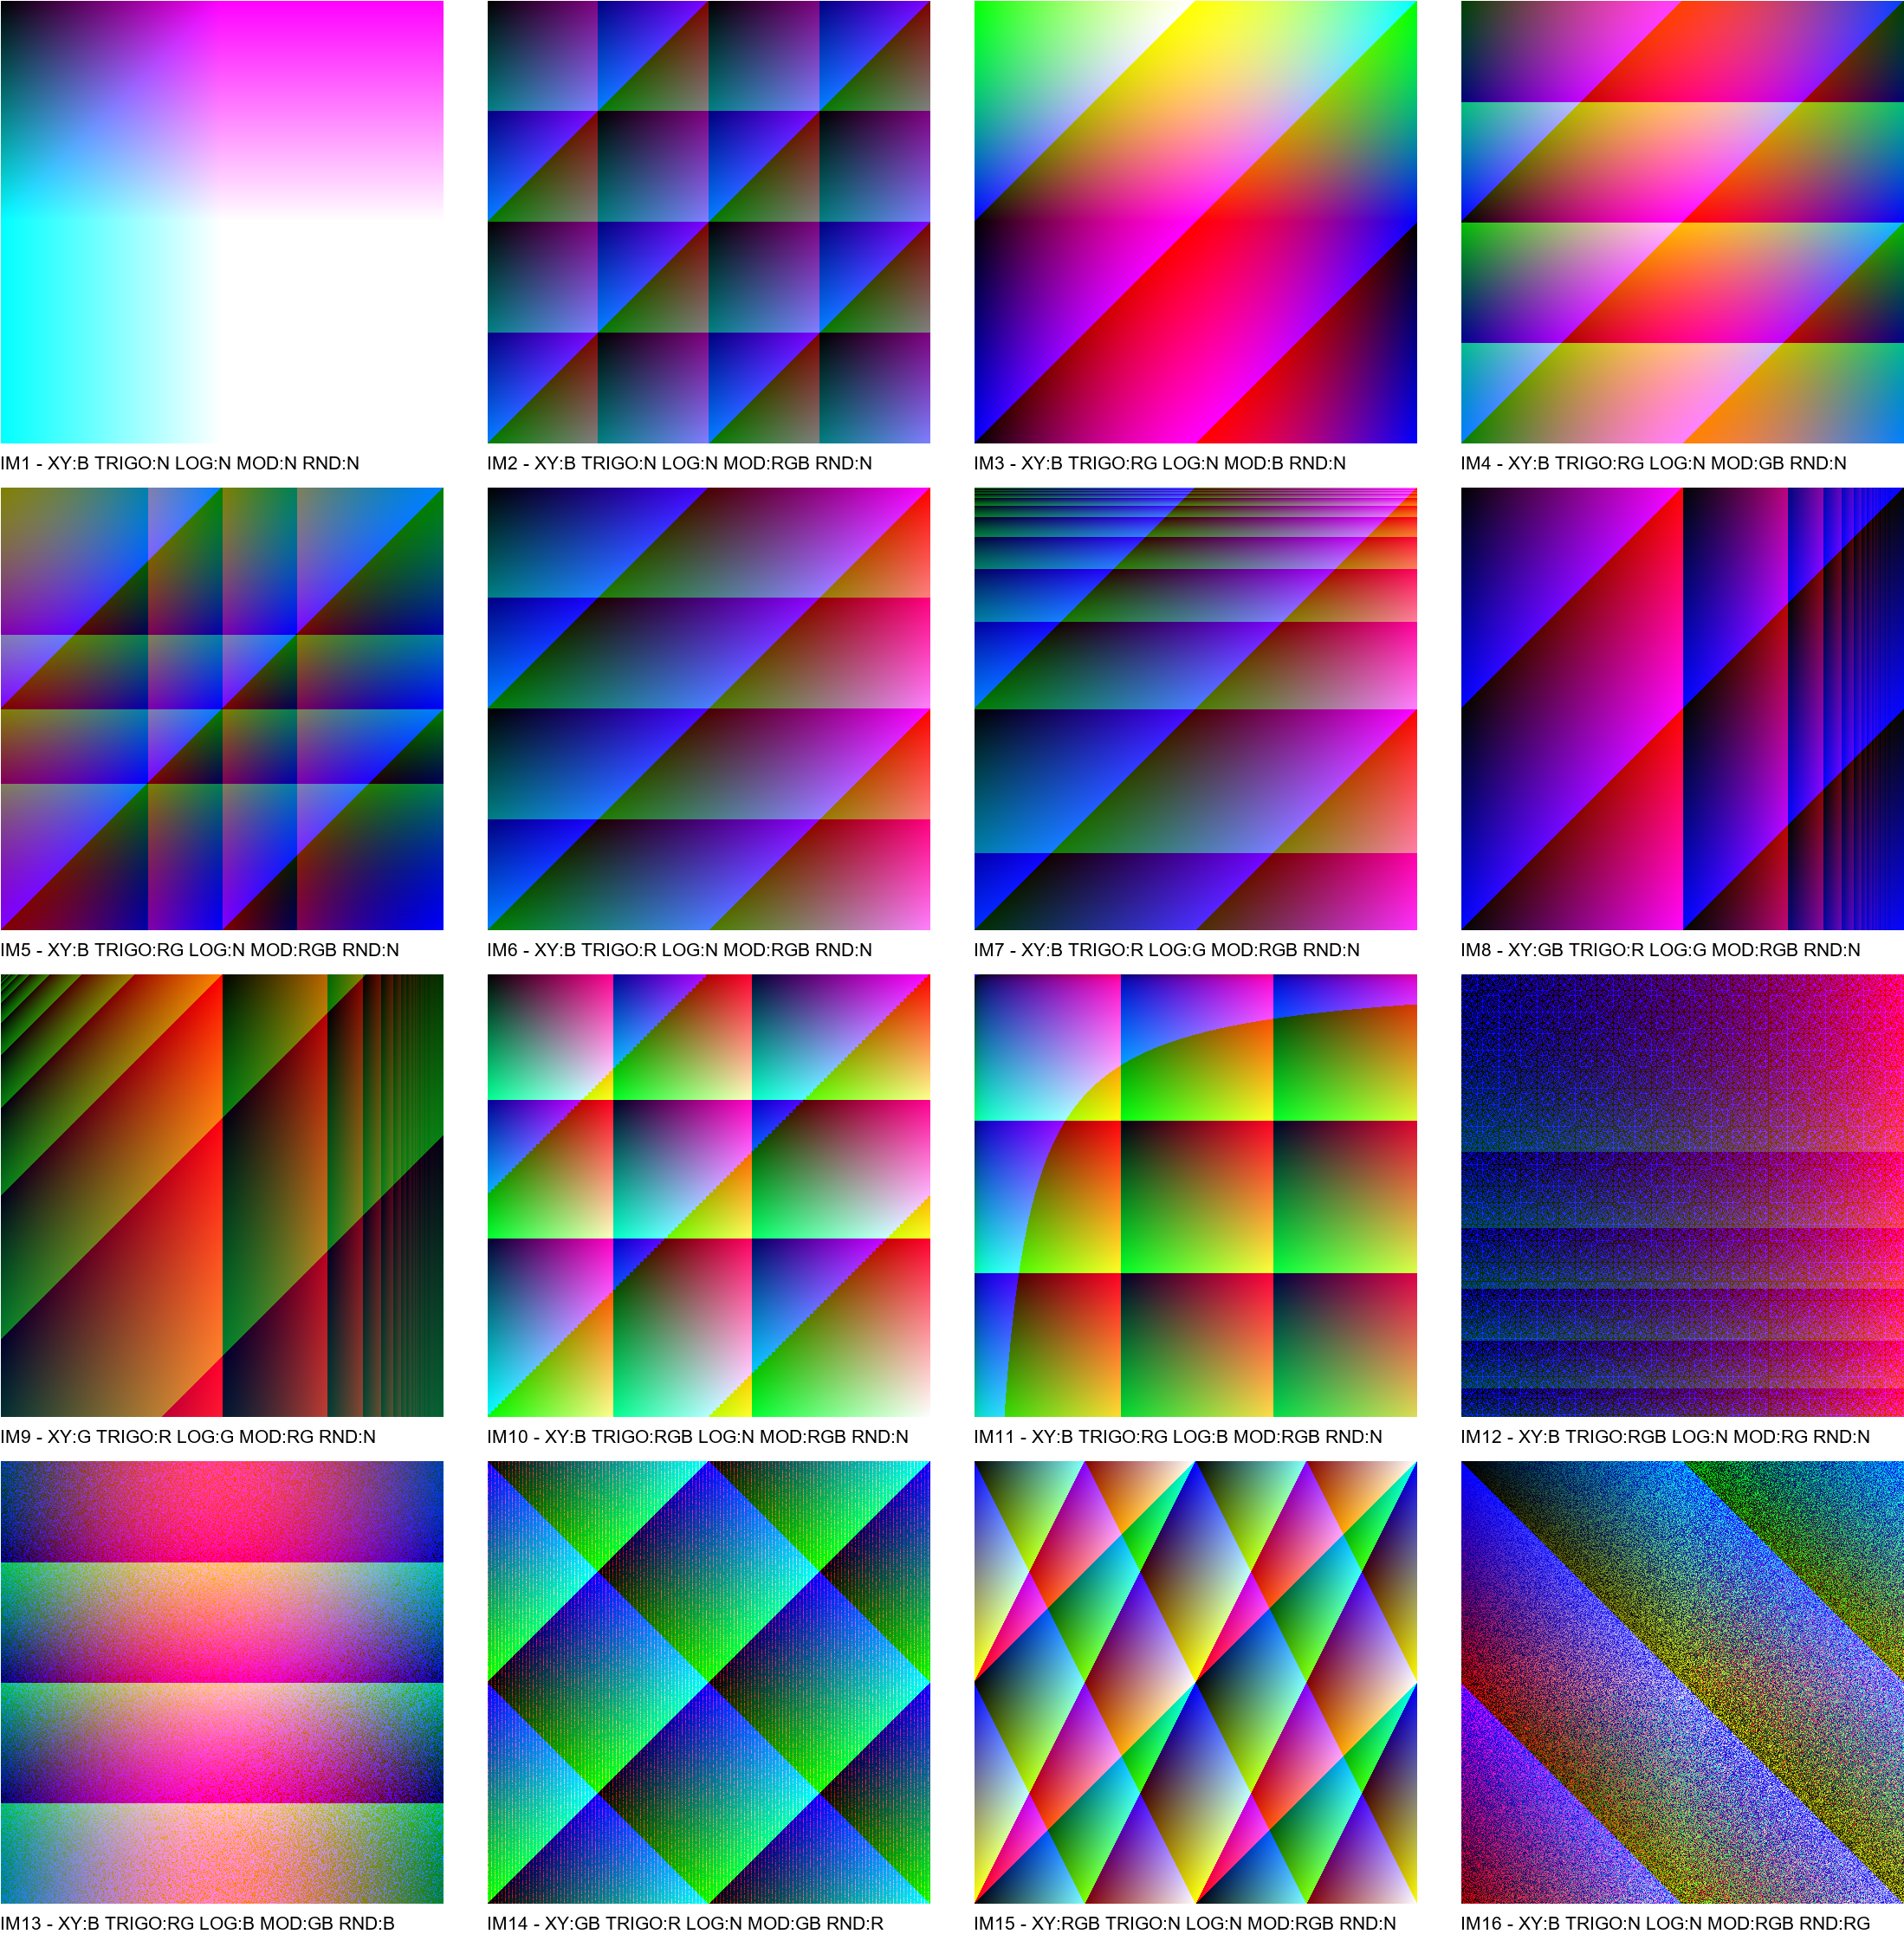

In [19]:
display(mosaic)

## Project perspective

This is the first visual abstract generative art I created to be published as NFT. This is also my first exploration in creating NFT at all.

More collections of generative art will be realised, also according to the reactions to this first one, following different inspirations, approaches and algorithms to ensure that every collection is unique and distinguishable from the others.



Notes:
* The code used to generate the collection has been written in Python using a jupyter Notebook.
* This project page has been realised converting the original **NFT RGB512 Notebook** in HTML using nbconvert (the code has been hidden for readibility)
* The source code is available in the same [github](https://github.com/caccio/Generative-NFT) public repository

In [20]:
W = 1536
H = 512
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (int(np.sin(x/W*np.pi)*256),int(np.cos(y/H*np.pi)*256)%192,int(256*np.log(x+y)+4)%256))
if save : im.save("RGB512\\COVER.png")
if show : display(im)

In [21]:
W = 1400
H = 400
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (int(np.sin(x/W*np.pi)*256),int(np.cos(y/H*np.pi)*256)%192,int(256*np.log(x+y)+2)%256))
if save : im.save("RGB512\\BANNER.png")
if show : display(im)

In [22]:
W = 600
H = 400
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (int(np.sin(x/W*np.pi)*256),int(np.cos(y/H*np.pi)*256)%192,int(256*np.log(x+y)+2)%256))
if save : im.save("RGB512\\FEATURED.png")
if show : display(im)

In [23]:
W = 400
H = 400
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (int(np.sin(x/W*np.pi)*256),int(np.cos(y/H*np.pi*2)*256)%192+32,int(256*np.cos(x+y*np.pi/4))%256+32))
if save : im.save("RGB512\\FAVICO.png")
if show : display(im)

In [24]:
W = 400
H = 400
im = Image.new("RGB", (W, H), "white")
rng = np.random.default_rng(31574)
for x in range(1,W) :
    for y in range(1,H) :
        t = rng.random(1)
        im.putpixel((x,y), (int(np.sin(x/W*np.pi)*256),int(np.cos(y/H*np.pi)*256)%192,int(256*np.log(x+y)+2)%256))
if save : im.save("RGB512\\LOGO.png")
if show : display(im)